In [1]:
from math import sqrt, log, pi, ceil, floor
import numpy as np
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Ubuntu Mono"
plt.rcParams['font.size'] = 9

%matplotlib widget

from earthing import *

c:\Users\klins\Github\Earthing\earthing\__init__.py:698: RuntimeWarning: divide by zero encountered in divide
  COEF = self.rho/(4*pi*a)*np.arctan(a/ALPHA)


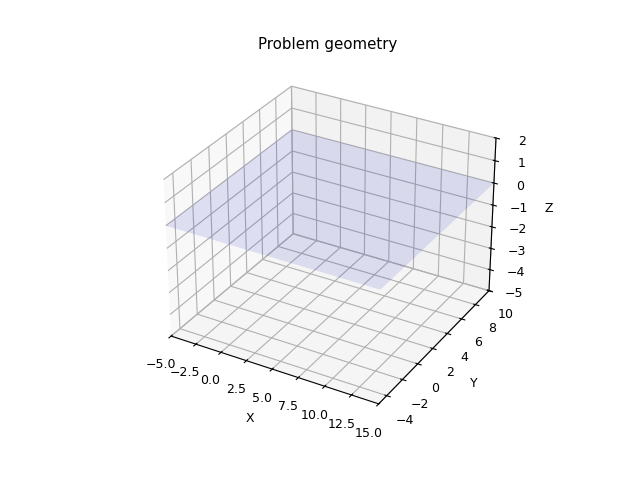

In [2]:
# define i/p parameters
strip_width = 0.025
radius_rod = 0.04  # Vertical earth strip for earth plate
h = 1.5
h_p = 3
Lx = 10
Ly = 5
Lr = 3.6
Nx = 2 
Ny = 2

rho = 100
xlim=(-5, Lx+5)
ylim=(-5, Ly+5)
zlim=(-5, 2)
grid=(50,50)
delta=0.2
Ig = 1000

# Define network
network1 = Network(rho, Ig)
network1.add_mesh([0,0,-h], Lx, Ly, Nx, Ny, strip_width)
network1.add_rod([0,0,-h], radius_rod, Lr)
network1.add_rod([Lx,0,-h], radius_rod, Lr)
network1.add_rod([0,Ly,-h], radius_rod, Lr)
network1.add_rod([Lx,Ly,-h], radius_rod, Lr)

# Add fence ring and electrode
network2 = Network(rho, 0)
network2.add_mesh([-2,-2,-h], Lx+4, Ly+4, 2, 2, strip_width)
network2.add_rod([-2,-2,-h], radius_rod, Lr)

network = network1 + network2

# Alternate network elements
# network.add_plate([0,0,-h_p], 0.6, 0.6, n_cap=[0,1,0], h_cap=[0,0,1])  # Vertical plate
# network.add_strip([0,0,-h], [Lx,Ly,-h], strip_width)  # Strip

# Generate model
network.generate_model_fast(delta)
network.plot_geometry_3d(xlim=xlim, ylim=ylim, zlim=zlim)

In [3]:
# Solve network
network.solve_model()
res = network.get_resistance()
print('Value of earth resistance = ', str(res),' Ohm')

Value of earth resistance =  [4.545   inf]  Ohm


c:\Users\klins\Github\Earthing\earthing\__init__.py:736: RuntimeWarning: divide by zero encountered in divide
  res = self.V / self.Ig


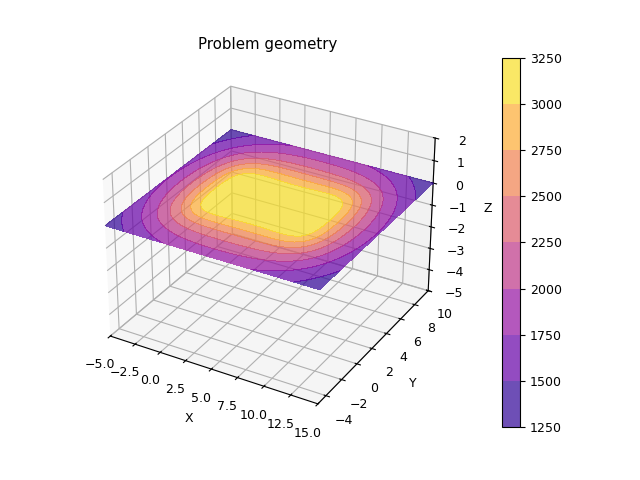

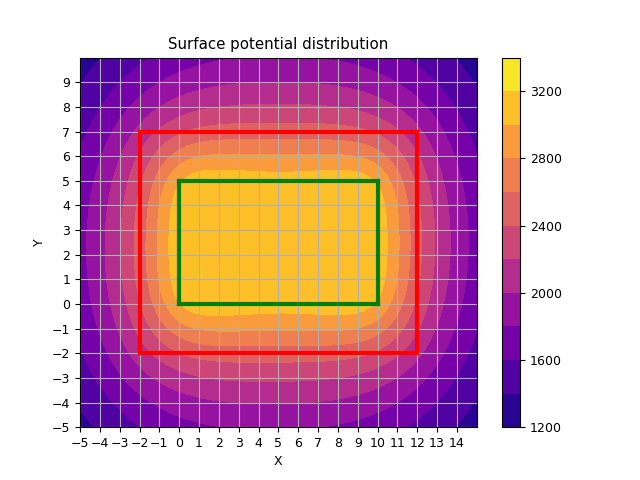

In [4]:
# Plot surface potential
network.solve_surface_potential_fast(grid=grid, xlim=xlim, ylim=ylim)
network.plot_geometry_3d(xlim=xlim, ylim=ylim, zlim=zlim, ground=False, ground_pot=True, current_distribution=True)
network.plot_surface_potential(xlim=xlim, ylim=ylim, plot_type='fill')
# network.plot_surface_potential(xlim=xlim, ylim=ylim, plot_type='contour')  # Contour plot
# network.plot_surface_potential(xlim=xlim, ylim=ylim, plot_type='values')  # Value plot

In [5]:
network.gpr()

array([4545.334, 2325.337])

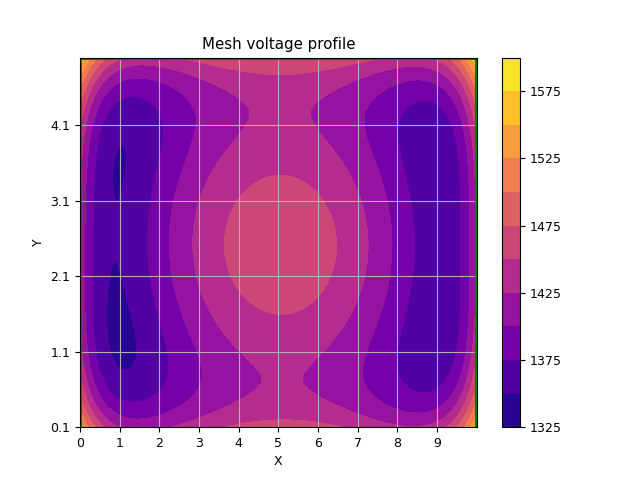

1578.622  @  [10.  5.]


In [6]:
# Mesh voltage
polygon = [(0,0),(Lx,0),(Lx,Ly),(0,Ly),(0,0)]
Em_loc, Em = network.mesh_voltage(polygon, plot=True, subnet=0)
print(Em, ' @ ', Em_loc)

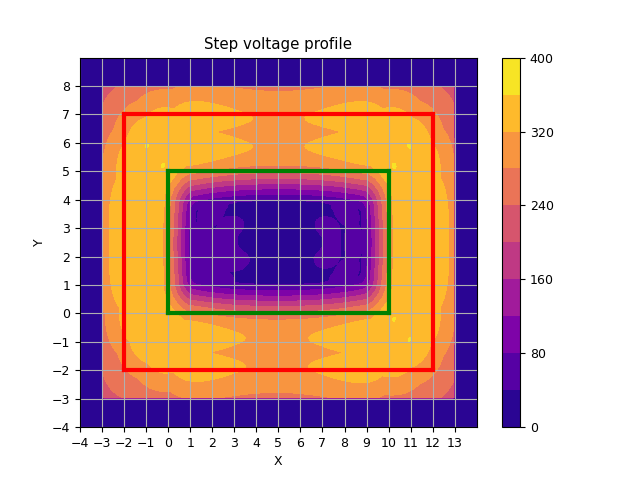

360.486  @  [10.244  5.185]


In [7]:
# Step voltage
polygon = rectangle((-3,-3), Lx+6, Ly+6)
Es_loc, Es = network.step_voltage(polygon, plot=True)
print(Es, ' @ ', Es_loc)

In [8]:
# Touch voltage at fence
network.get_point_potential((-2,-2,0)) - network.get_point_potential((-3,-3,0))

322.13176284757924